# ARIMA Model

### What is an ARIMA model?

**AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

**I:** Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


##### The parameters of the ARIMA model are defined as follows:

**p:** The number of lag observations included in the model, also called the lag order.

**d:** The number of times that the raw observations are differenced, also called the degree of differencing.

**q:** The size of the moving average window, also called the order of moving average.

### Import Packages

In [1]:
import os
import pandas as pd
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#from pmdarima.arima import auto_arima
#import time

### Get Data

In [2]:
data_dir = "/gpfs/gpfs0/project/SDS/instructional/ds5110_sp23_finalproject/"

agg_data_daily = pd.read_csv(data_dir + "aggregate_data_daily.csv")

In [3]:
agg_data_daily.date = pd.to_datetime(agg_data_daily['date'])
agg_data_daily = agg_data_daily.set_index("date")

In [4]:
agg_data_daily.head()

,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,131288.958237,131349.417179,131229.601955,131286.480705,913732.743590,131284.209006,131278.897301,131274.004613,131269.574686,131284.381505,...,4185.103972,4349.078852,4347.786014,4243.926555,-4569.996794,123.060885,123.854199,131289.325791,1856.672161,29.413975
2015-02-03,131832.877280,131918.827600,131747.429387,131837.580720,936348.072000,131841.322645,131851.470080,131861.067426,131870.462753,131841.190402,...,4201.208571,4267.691967,4266.097873,4349.520327,-4624.607800,175.531286,177.491147,131833.044756,1850.806014,32.266154
2015-02-04,129468.922827,129537.612613,129402.188933,129471.623013,887441.512000,129480.442459,129493.245917,129505.959004,129518.131477,129480.170210,...,4282.346297,4365.674560,4366.273596,4309.880640,-4478.144418,143.180905,143.231867,129469.574791,1810.422482,32.472286
2015-02-05,129249.723173,129317.821493,129181.671733,129248.157733,853214.317333,129247.353024,129246.376232,129246.078405,129246.293272,129247.729483,...,4360.040253,4370.202737,4371.174798,4390.548113,-4422.675177,142.086475,142.190373,129249.738800,1866.926771,34.137286
2015-02-06,127985.717387,128065.870400,127915.340693,127994.159200,813405.013333,127991.635936,127998.763027,128006.067154,128013.714268,127991.612995,...,4281.577005,4405.903914,4408.064297,4285.640985,-4514.621708,158.384781,157.028987,127988.976160,1823.159505,31.149459


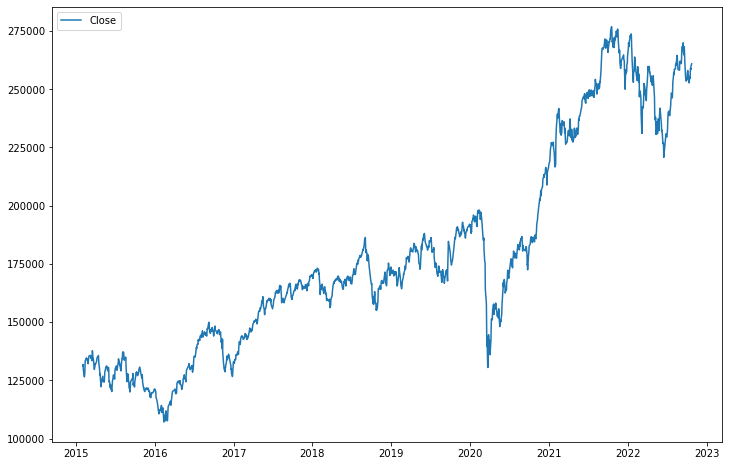

In [5]:
plt.figure(figsize=(12,8))
plt.plot(agg_data_daily.index, agg_data_daily.close, label="Close")
plt.legend(loc="upper left")
plt.show()

In [6]:
model = ARIMA(agg_data_daily.close, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1769
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15772.671
Date:                Mon, 10 Apr 2023   AIC                          31551.343
Time:                        18:41:25   BIC                          31567.776
Sample:                             0   HQIC                         31557.414
                               - 1769                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0113      0.179     -0.063      0.950      -0.362       0.339
ma.L1          0.0778      0.179      0.434      0.664      -0.274       0.430
sigma2      3.229e+06   5.54e+04     58.294      0.0

/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
# agg_data_daily.index[:1500]

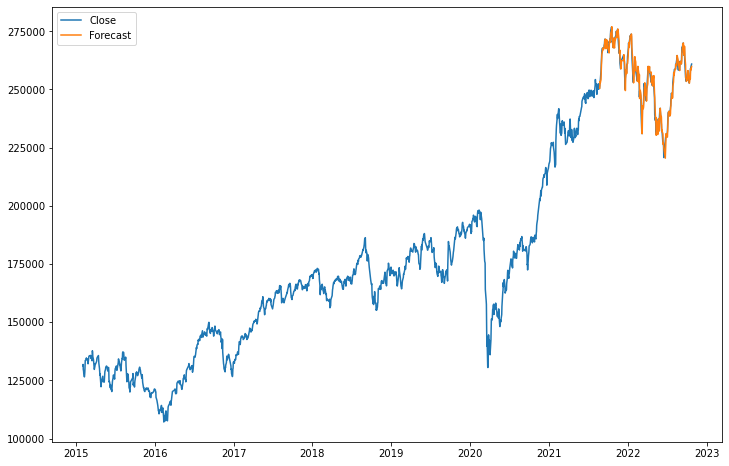

In [10]:
agg_data_daily["close_forecast"] = model_fit.predict('2021-08-24', '2022-10-24')

plt.figure(figsize=(12,8))
plt.plot(agg_data_daily.index, agg_data_daily.close, label = "Close")
plt.plot(agg_data_daily.index, agg_data_daily.close_forecast, label = "Forecast")
plt.legend()
plt.savefig('agg_daily_forecast.png')
plt.show()

In [11]:
agg_data_hourly = pd.read_csv(data_dir + "aggregate_data_hourly.csv")

In [12]:
agg_data_hourly.date = pd.to_datetime(agg_data_hourly['date'])
agg_data_hourly = agg_data_hourly.set_index("date")

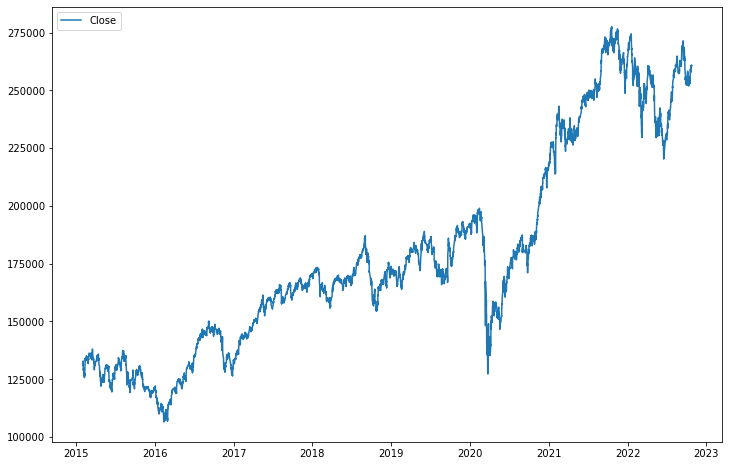

In [13]:
plt.figure(figsize=(12,8))
plt.plot(agg_data_hourly.index, agg_data_hourly.close, label="Close")
plt.legend(loc="upper left")
plt.show()

In [21]:
model_hourly = ARIMA(agg_data_hourly.close, order=(1,1,1))
model_hourly_fit = model_hourly.fit()
print(model_hourly_fit.summary())

/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                12341
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -97705.774
Date:                Mon, 10 Apr 2023   AIC                         195417.549
Time:                        18:53:56   BIC                         195439.811
Sample:                             0   HQIC                        195425.006
                              - 12341                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3157      0.048      6.579      0.000       0.222       0.410
ma.L1         -0.2309      0.049     -4.744      0.000      -0.326      -0.136
sigma2      4.401e+05   1126.478    390.687      0.0

In [17]:
agg_data_hourly.index[10000:]

DatetimeIndex(['2021-05-10 10:00:00', '2021-05-10 11:00:00',
               '2021-05-10 12:00:00', '2021-05-10 13:00:00',
               '2021-05-10 14:00:00', '2021-05-10 15:00:00',
               '2021-05-11 09:00:00', '2021-05-11 10:00:00',
               '2021-05-11 11:00:00', '2021-05-11 12:00:00',
               ...
               '2022-10-20 15:00:00', '2022-10-21 09:00:00',
               '2022-10-21 10:00:00', '2022-10-21 11:00:00',
               '2022-10-21 12:00:00', '2022-10-21 13:00:00',
               '2022-10-21 14:00:00', '2022-10-21 15:00:00',
               '2022-10-24 18:00:00', '2022-10-24 19:00:00'],
              dtype='datetime64[ns]', name='date', length=2341, freq=None)

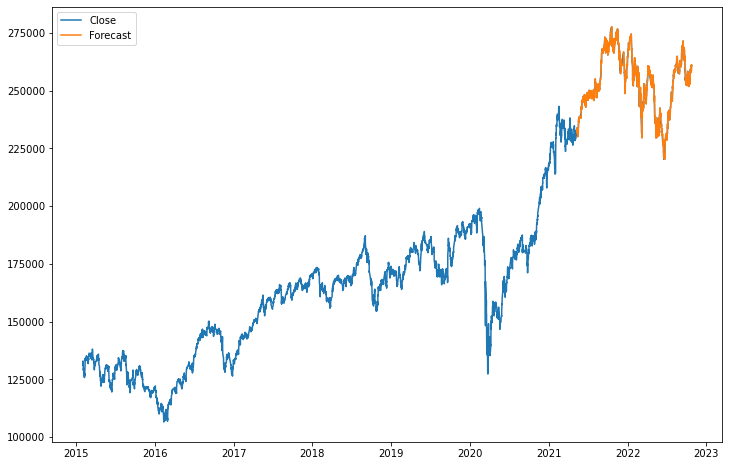

In [22]:
agg_data_hourly["close_forecast"] = model_hourly_fit.predict('2021-05-10 10:00:00', '2022-10-24 19:00:00')

plt.figure(figsize=(12,8))
plt.plot(agg_data_hourly.index, agg_data_hourly.close, label = "Close")
plt.plot(agg_data_hourly.index, agg_data_hourly.close_forecast, label = "Forecast")
plt.legend()
plt.savefig('agg_hourly_forecast.png')
plt.show()